<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/deeplearningstudy/blob/main/yolo_finetuning_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 79.5MB/s]


In [ ]:
# Colab에서 YAML 수정
yaml_path = '/content/drive/MyDrive/kdt_2506/dataset/dataset/data.yaml'

with open(yaml_path, 'r') as f:
    lines = f.readlines()

with open(yaml_path, 'w') as f:
    for line in lines:
        if line.startswith('train:'):
            f.write('train: /content/drive/MyDrive/kdt_2506/dataset/dataset/images/train\n')
        elif line.startswith('val:'):
            f.write('val: /content/drive/MyDrive/kdt_2506/dataset/dataset/images/val\n')
        else:
            f.write(line)

In [ ]:
model.train(data = '/content/drive/MyDrive/kdt_2506/dataset/dataset/data.yaml',
            epochs=50,
            imgsz=480,
            batch=16)

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/kdt_2506/dataset/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

100%|██████████| 755k/755k [00:00<00:00, 13.9MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 65.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.9±0.9 ms, read: 0.7±0.6 MB/s, size: 222.8 KB)


train: Scanning /content/drive/MyDrive/kdt_2506/dataset/dataset/labels/train... 2703 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2703/2703 [01:58<00:00, 22.80it/s]


train: New cache created: /content/drive/MyDrive/kdt_2506/dataset/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 1.1±0.7 MB/s, size: 550.2 KB)


val: Scanning /content/drive/MyDrive/kdt_2506/dataset/dataset/labels/val... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:11<00:00, 26.83it/s]


val: New cache created: /content/drive/MyDrive/kdt_2506/dataset/dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 480 train, 480 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.13G      1.284      2.347      1.466         36        480: 100%|██████████| 169/169 [00:18<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        300        313      0.539      0.497      0.482      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.38G      1.318      1.947      1.495         25        480: 100%|██████████| 169/169 [00:14<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.68it/s]

                   all        300        313      0.281      0.354      0.262      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.39G      1.374      1.911      1.535         37        480: 100%|██████████| 169/169 [00:14<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.33it/s]

                   all        300        313      0.516      0.364      0.385      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.39G      1.361      1.758      1.521         43        480: 100%|██████████| 169/169 [00:14<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.83it/s]

                   all        300        313      0.602      0.487      0.519      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.41G      1.323      1.653      1.486         41        480: 100%|██████████| 169/169 [00:14<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.80it/s]


                   all        300        313      0.586      0.432      0.488      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.43G      1.276      1.574      1.452         43        480: 100%|██████████| 169/169 [00:14<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        300        313      0.638      0.534      0.582       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.44G      1.246      1.463      1.433         37        480: 100%|██████████| 169/169 [00:14<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.64it/s]


                   all        300        313      0.638      0.449      0.534      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.45G      1.236      1.444      1.422         36        480: 100%|██████████| 169/169 [00:14<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.78it/s]


                   all        300        313      0.776      0.503       0.61      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.46G      1.192      1.362      1.393         33        480: 100%|██████████| 169/169 [00:14<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.98it/s]

                   all        300        313      0.658      0.593      0.657      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.48G      1.176      1.333       1.38         38        480: 100%|██████████| 169/169 [00:14<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.88it/s]

                   all        300        313      0.671      0.525      0.626      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.48G      1.169      1.278      1.368         33        480: 100%|██████████| 169/169 [00:14<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.10it/s]

                   all        300        313       0.67      0.642      0.681      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.48G      1.137      1.244      1.353         32        480: 100%|██████████| 169/169 [00:14<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.60it/s]

                   all        300        313      0.738      0.592        0.7      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.48G      1.111      1.195      1.335         30        480: 100%|██████████| 169/169 [00:14<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.90it/s]


                   all        300        313      0.764      0.657      0.758      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.48G      1.126      1.178      1.341         35        480: 100%|██████████| 169/169 [00:14<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        300        313      0.794       0.69      0.752      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.48G      1.095      1.153      1.316         29        480: 100%|██████████| 169/169 [00:14<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.76it/s]

                   all        300        313      0.672      0.625      0.668      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.48G      1.075      1.119      1.309         34        480: 100%|██████████| 169/169 [00:14<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.90it/s]

                   all        300        313      0.725      0.673      0.712      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.48G      1.049      1.087      1.283         45        480: 100%|██████████| 169/169 [00:14<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.03it/s]


                   all        300        313      0.791       0.69      0.781       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.48G      1.038      1.049      1.278         33        480: 100%|██████████| 169/169 [00:14<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.45it/s]

                   all        300        313       0.77      0.685      0.756      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.48G      1.045      1.046      1.288         42        480: 100%|██████████| 169/169 [00:14<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.04it/s]

                   all        300        313      0.837      0.674       0.77      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.48G      1.032      1.025      1.272         35        480: 100%|██████████| 169/169 [00:14<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]

                   all        300        313       0.82      0.666      0.776      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.48G      1.017      1.038      1.268         41        480: 100%|██████████| 169/169 [00:14<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.10it/s]

                   all        300        313      0.782      0.716       0.77      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.48G       1.01      1.011      1.265         39        480: 100%|██████████| 169/169 [00:14<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.56it/s]

                   all        300        313      0.768      0.696      0.729      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.48G     0.9923     0.9642      1.247         38        480: 100%|██████████| 169/169 [00:14<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.16it/s]


                   all        300        313      0.816      0.763      0.817      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.48G     0.9934     0.9637      1.242         38        480: 100%|██████████| 169/169 [00:14<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]


                   all        300        313      0.863      0.729      0.802       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.48G     0.9792     0.9329      1.233         34        480: 100%|██████████| 169/169 [00:14<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.96it/s]

                   all        300        313      0.783      0.638      0.739      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.48G      0.966     0.9192      1.231         39        480: 100%|██████████| 169/169 [00:14<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.18it/s]

                   all        300        313       0.84      0.728      0.812      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.48G     0.9687       0.91      1.224         35        480: 100%|██████████| 169/169 [00:14<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.60it/s]


                   all        300        313      0.847      0.684      0.799      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.48G     0.9466     0.8931      1.208         31        480: 100%|██████████| 169/169 [00:14<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.98it/s]


                   all        300        313      0.812      0.723      0.783      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.48G     0.9487     0.8627      1.209         36        480: 100%|██████████| 169/169 [00:14<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.46it/s]

                   all        300        313      0.782      0.765      0.801      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.48G     0.9253     0.8454      1.203         41        480: 100%|██████████| 169/169 [00:25<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.82it/s]

                   all        300        313      0.808      0.758      0.808      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.48G     0.8908     0.8137      1.188         37        480: 100%|██████████| 169/169 [00:14<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.85it/s]

                   all        300        313      0.836      0.759      0.841       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.48G     0.9109     0.8239      1.195         42        480: 100%|██████████| 169/169 [00:14<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.31it/s]

                   all        300        313       0.82      0.726      0.783      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.48G     0.9018     0.8098      1.188         31        480: 100%|██████████| 169/169 [00:14<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.96it/s]

                   all        300        313      0.823      0.761      0.824       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.48G     0.8917     0.7983      1.181         34        480: 100%|██████████| 169/169 [00:14<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.31it/s]

                   all        300        313      0.849      0.748      0.843      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.48G     0.8838     0.7963      1.164         36        480: 100%|██████████| 169/169 [00:14<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.19it/s]

                   all        300        313      0.812      0.781      0.846      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.48G      0.875     0.7764      1.165         43        480: 100%|██████████| 169/169 [00:14<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.76it/s]

                   all        300        313       0.82       0.79      0.845      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.48G     0.8712     0.7613      1.163         45        480: 100%|██████████| 169/169 [00:14<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.82it/s]

                   all        300        313      0.851      0.806      0.848      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.48G     0.8691     0.7563      1.162         38        480: 100%|██████████| 169/169 [00:14<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.66it/s]

                   all        300        313       0.82      0.784      0.835      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.48G     0.8509     0.7367      1.149         45        480: 100%|██████████| 169/169 [00:14<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]

                   all        300        313      0.896      0.737      0.862      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.48G      0.847      0.742      1.153         37        480: 100%|██████████| 169/169 [00:14<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.20it/s]

                   all        300        313      0.897      0.778      0.856      0.568


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.5G     0.7838     0.5525      1.101         15        480: 100%|██████████| 169/169 [00:15<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.31it/s]

                   all        300        313      0.884      0.769      0.848      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       1.5G     0.7691     0.5277      1.094         17        480: 100%|██████████| 169/169 [00:14<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.66it/s]


                   all        300        313      0.867      0.766      0.862      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       1.5G     0.7503     0.5099      1.088         15        480: 100%|██████████| 169/169 [00:14<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.19it/s]


                   all        300        313      0.866      0.761      0.847       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       1.5G     0.7329     0.4897      1.069         16        480: 100%|██████████| 169/169 [00:14<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.19it/s]


                   all        300        313      0.866      0.767      0.856      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       1.5G     0.7198     0.4785      1.065         14        480: 100%|██████████| 169/169 [00:14<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.49it/s]

                   all        300        313      0.881      0.776      0.864      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       1.5G     0.7091     0.4617      1.051         17        480: 100%|██████████| 169/169 [00:14<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]

                   all        300        313      0.887       0.79      0.866      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       1.5G     0.6953     0.4638      1.047         15        480: 100%|██████████| 169/169 [00:14<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.97it/s]

                   all        300        313      0.866      0.792      0.863      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.5G     0.6772     0.4367      1.039         15        480: 100%|██████████| 169/169 [00:14<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.93it/s]

                   all        300        313      0.886      0.788      0.878       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       1.5G     0.6723     0.4267      1.029         18        480: 100%|██████████| 169/169 [00:14<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.14it/s]


                   all        300        313      0.865      0.793      0.873      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.5G     0.6562     0.4214      1.021         15        480: 100%|██████████| 169/169 [00:14<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.82it/s]

                   all        300        313      0.918      0.763      0.875      0.591



50 epochs completed in 0.228 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.41it/s]


                   all        300        313      0.865      0.793      0.873      0.591
                Pistol        100        100      0.847      0.555      0.741      0.498
                Camera        100        113      0.819      0.903      0.919      0.647
                 Knife        100        100      0.929      0.921      0.959      0.629
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea68d9c9dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# from ultralytics import YOLO
# model = YOLO("yolov8n.pt")
# model.train(data='/content/drive/MyDrive/kdt_2506/dataset/dataset/data.yaml', epochs=50, imgsz=480)


New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/kdt_2506/dataset/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, n

train: Scanning /content/drive/MyDrive/kdt_2506/dataset/dataset/labels/train.cache... 2703 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2703/2703 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.7 ms, read: 125.5±71.5 MB/s, size: 550.2 KB)


val: Scanning /content/drive/MyDrive/kdt_2506/dataset/dataset/labels/val.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 480 train, 480 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       1.2G      1.284      2.347      1.466         36        480: 100%|██████████| 169/169 [00:16<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.37it/s]

                   all        300        313      0.539      0.497      0.482      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.43G      1.318      1.947      1.495         25        480: 100%|██████████| 169/169 [00:15<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.33it/s]

                   all        300        313      0.281      0.354      0.262      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.43G      1.374      1.911      1.535         37        480: 100%|██████████| 169/169 [00:14<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.44it/s]

                   all        300        313      0.516      0.364      0.385      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.43G      1.361      1.758      1.521         43        480: 100%|██████████| 169/169 [00:14<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.53it/s]

                   all        300        313      0.602      0.487      0.519      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.43G      1.323      1.653      1.486         41        480: 100%|██████████| 169/169 [00:14<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.59it/s]

                   all        300        313      0.586      0.432      0.488      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.43G      1.276      1.574      1.452         43        480: 100%|██████████| 169/169 [00:14<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]


                   all        300        313      0.638      0.534      0.582       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.43G      1.246      1.463      1.433         37        480: 100%|██████████| 169/169 [00:14<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.60it/s]

                   all        300        313      0.638      0.449      0.534      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.43G      1.236      1.444      1.422         36        480: 100%|██████████| 169/169 [00:14<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.03it/s]

                   all        300        313      0.776      0.503       0.61      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.43G      1.192      1.362      1.393         33        480: 100%|██████████| 169/169 [00:14<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.30it/s]

                   all        300        313      0.658      0.593      0.657      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.43G      1.176      1.333       1.38         38        480: 100%|██████████| 169/169 [00:14<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.19it/s]


                   all        300        313      0.671      0.525      0.626      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.43G      1.169      1.278      1.368         33        480: 100%|██████████| 169/169 [00:14<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.90it/s]


                   all        300        313       0.67      0.642      0.681      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.43G      1.137      1.244      1.353         32        480: 100%|██████████| 169/169 [00:14<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.84it/s]


                   all        300        313      0.738      0.592        0.7      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.43G      1.111      1.195      1.335         30        480: 100%|██████████| 169/169 [00:14<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.48it/s]

                   all        300        313      0.764      0.657      0.758      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.43G      1.126      1.178      1.341         35        480: 100%|██████████| 169/169 [00:14<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.62it/s]

                   all        300        313      0.794       0.69      0.752      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.43G      1.095      1.153      1.316         29        480: 100%|██████████| 169/169 [00:14<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.76it/s]


                   all        300        313      0.672      0.625      0.668      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.43G      1.075      1.119      1.309         34        480: 100%|██████████| 169/169 [00:14<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.52it/s]

                   all        300        313      0.725      0.673      0.712      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.44G      1.049      1.087      1.283         45        480: 100%|██████████| 169/169 [00:14<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.64it/s]

                   all        300        313      0.791       0.69      0.781       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.44G      1.038      1.049      1.278         33        480: 100%|██████████| 169/169 [00:14<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.56it/s]


                   all        300        313       0.77      0.685      0.756      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.44G      1.045      1.046      1.288         42        480: 100%|██████████| 169/169 [00:14<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.50it/s]


                   all        300        313      0.837      0.674       0.77      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.46G      1.032      1.025      1.272         35        480: 100%|██████████| 169/169 [00:14<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.25it/s]


                   all        300        313       0.82      0.666      0.776      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.46G      1.017      1.038      1.268         41        480: 100%|██████████| 169/169 [00:14<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]


                   all        300        313      0.782      0.716       0.77      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.47G       1.01      1.011      1.265         39        480: 100%|██████████| 169/169 [00:14<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.92it/s]

                   all        300        313      0.768      0.696      0.729      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.47G     0.9923     0.9642      1.247         38        480: 100%|██████████| 169/169 [00:14<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.60it/s]

                   all        300        313      0.816      0.763      0.817      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.47G     0.9934     0.9637      1.242         38        480: 100%|██████████| 169/169 [00:14<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.85it/s]


                   all        300        313      0.863      0.729      0.802       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.47G     0.9792     0.9329      1.233         34        480: 100%|██████████| 169/169 [00:14<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.81it/s]

                   all        300        313      0.783      0.638      0.739      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.47G      0.966     0.9192      1.231         39        480: 100%|██████████| 169/169 [00:14<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.92it/s]

                   all        300        313       0.84      0.728      0.812      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.47G     0.9687       0.91      1.224         35        480: 100%|██████████| 169/169 [00:14<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.29it/s]

                   all        300        313      0.847      0.684      0.799      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.47G     0.9466     0.8931      1.208         31        480: 100%|██████████| 169/169 [00:14<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.88it/s]

                   all        300        313      0.812      0.723      0.783      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.47G     0.9487     0.8627      1.209         36        480: 100%|██████████| 169/169 [00:14<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.26it/s]


                   all        300        313      0.782      0.765      0.801      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.47G     0.9253     0.8454      1.203         41        480: 100%|██████████| 169/169 [00:14<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.91it/s]

                   all        300        313      0.808      0.758      0.808      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.49G     0.8908     0.8137      1.188         37        480: 100%|██████████| 169/169 [00:14<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.48it/s]


                   all        300        313      0.836      0.759      0.841       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.51G     0.9109     0.8239      1.195         42        480: 100%|██████████| 169/169 [00:14<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.28it/s]


                   all        300        313       0.82      0.726      0.783      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.51G     0.9018     0.8098      1.188         31        480: 100%|██████████| 169/169 [00:14<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.19it/s]

                   all        300        313      0.823      0.761      0.824       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.51G     0.8917     0.7983      1.181         34        480: 100%|██████████| 169/169 [00:14<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.39it/s]

                   all        300        313      0.849      0.748      0.843      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.51G     0.8838     0.7963      1.164         36        480: 100%|██████████| 169/169 [00:14<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.04it/s]


                   all        300        313      0.812      0.781      0.846      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.51G      0.875     0.7764      1.165         43        480: 100%|██████████| 169/169 [00:14<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.13it/s]

                   all        300        313       0.82       0.79      0.845      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.51G     0.8712     0.7613      1.163         45        480: 100%|██████████| 169/169 [00:14<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]


                   all        300        313      0.851      0.806      0.848      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.51G     0.8691     0.7563      1.162         38        480: 100%|██████████| 169/169 [00:14<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.40it/s]


                   all        300        313       0.82      0.784      0.835      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.51G     0.8509     0.7367      1.149         45        480: 100%|██████████| 169/169 [00:14<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.86it/s]

                   all        300        313      0.896      0.737      0.862      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.51G      0.847      0.742      1.153         37        480: 100%|██████████| 169/169 [00:14<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.08it/s]

                   all        300        313      0.897      0.778      0.856      0.568


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.51G     0.7838     0.5525      1.101         15        480: 100%|██████████| 169/169 [00:15<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.30it/s]

                   all        300        313      0.884      0.769      0.848      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.51G     0.7691     0.5277      1.094         17        480: 100%|██████████| 169/169 [00:14<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.61it/s]


                   all        300        313      0.867      0.766      0.862      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.51G     0.7503     0.5099      1.088         15        480: 100%|██████████| 169/169 [00:14<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.64it/s]

                   all        300        313      0.866      0.761      0.847       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.51G     0.7329     0.4897      1.069         16        480: 100%|██████████| 169/169 [00:14<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.84it/s]

                   all        300        313      0.866      0.767      0.856      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.51G     0.7198     0.4785      1.065         14        480: 100%|██████████| 169/169 [00:14<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.81it/s]

                   all        300        313      0.881      0.776      0.864      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.51G     0.7091     0.4617      1.051         17        480: 100%|██████████| 169/169 [00:14<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.04it/s]

                   all        300        313      0.887       0.79      0.866      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.51G     0.6953     0.4638      1.047         15        480: 100%|██████████| 169/169 [00:14<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.06it/s]


                   all        300        313      0.866      0.792      0.863      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.51G     0.6772     0.4367      1.039         15        480: 100%|██████████| 169/169 [00:14<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.59it/s]

                   all        300        313      0.886      0.788      0.878       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.51G     0.6723     0.4267      1.029         18        480: 100%|██████████| 169/169 [00:14<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.22it/s]


                   all        300        313      0.865      0.793      0.873      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.52G     0.6562     0.4214      1.021         15        480: 100%|██████████| 169/169 [00:14<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.22it/s]

                   all        300        313      0.918      0.763      0.875      0.591



50 epochs completed in 0.227 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.43it/s]


                   all        300        313      0.865      0.793      0.873      0.591
                Pistol        100        100      0.847      0.555      0.741      0.498
                Camera        100        113      0.819      0.903      0.919      0.647
                 Knife        100        100      0.929      0.921      0.959      0.629
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea67c400d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# val: 학습 중 평가와는 별도로 수동 평가
metrics = model.val(data='/content/drive/MyDrive/kdt_2506/dataset/dataset/data.yaml')
print(metrics)

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 199.3±227.1 MB/s, size: 511.1 KB)


val: Scanning /content/drive/MyDrive/kdt_2506/dataset/dataset/labels/val.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.70it/s]


                   all        300        313      0.869      0.796      0.873      0.591
                Pistol        100        100       0.85      0.566      0.741      0.497
                Camera        100        113      0.819      0.903      0.919      0.648
                 Knife        100        100      0.937       0.92      0.959      0.629
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea67c255d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,  

In [ ]:
# # 예시: 별도의 test.yaml 파일이 존재한다고 가정
# test_metrics = model.val(data='/content/drive/MyDrive/kdt_2506/dataset/dataset/test.yaml')
# print(test_metrics)

In [ ]:
# # 단일 이미지 예측
# results = model.predict(source='/content/drive/MyDrive/kdt_2506/dataset/dataset/images/test/test_img.jpg',
#                         save=True,
#                         imgsz=480,
#                         conf=0.25)

# 폴더 단위 예측
results = model.predict(source='/content/drive/MyDrive/kdt_2506/dataset/dataset/images/test',
                        save=True,
                        imgsz=480,
                        conf=0.25,
                        save_txt=True)     # 예측된 좌표를 txt로 저장



image 1/197 /content/drive/MyDrive/kdt_2506/dataset/dataset/images/test/00XqEGK3NGufUde5l1jLuVH-7-fit_lim-size_760x427-v1675031904_jpg.rf.a56eb7058522a86efc3f0ccae74e6f10.jpg: 480x480 2 Cameras, 11.2ms
image 2/197 /content/drive/MyDrive/kdt_2506/dataset/dataset/images/test/00aa1fb79323c0fb_jpg.rf.16c95cb126e7ab73dcd66d1d9efdbbaa.jpg: 480x480 2 Cameras, 9.5ms
image 3/197 /content/drive/MyDrive/kdt_2506/dataset/dataset/images/test/00aeaa933017a871_jpg.rf.d3e408c364eb603ba44eec29b93fb0de.jpg: 480x480 1 Camera, 8.3ms
image 4/197 /content/drive/MyDrive/kdt_2506/dataset/dataset/images/test/00b3a08279996c9d_jpg.rf.84ce54341e7bfe37942ef92170370f9d.jpg: 480x480 2 Cameras, 7.6ms
image 5/197 /content/drive/MyDrive/kdt_2506/dataset/dataset/images/test/00b58edea28e40c1_jpg.rf.dc0661cfd935d8f3876d8744dbb1da30.jpg: 480x480 2 Cameras, 7.5ms
image 6/197 /content/drive/MyDrive/kdt_2506/dataset/dataset/images/test/00c34410bb2c2b98_jpg.rf.bdf954e415093033a567e90c1da1b0d1.jpg: 480x480 1 Camera, 7.3ms
imag

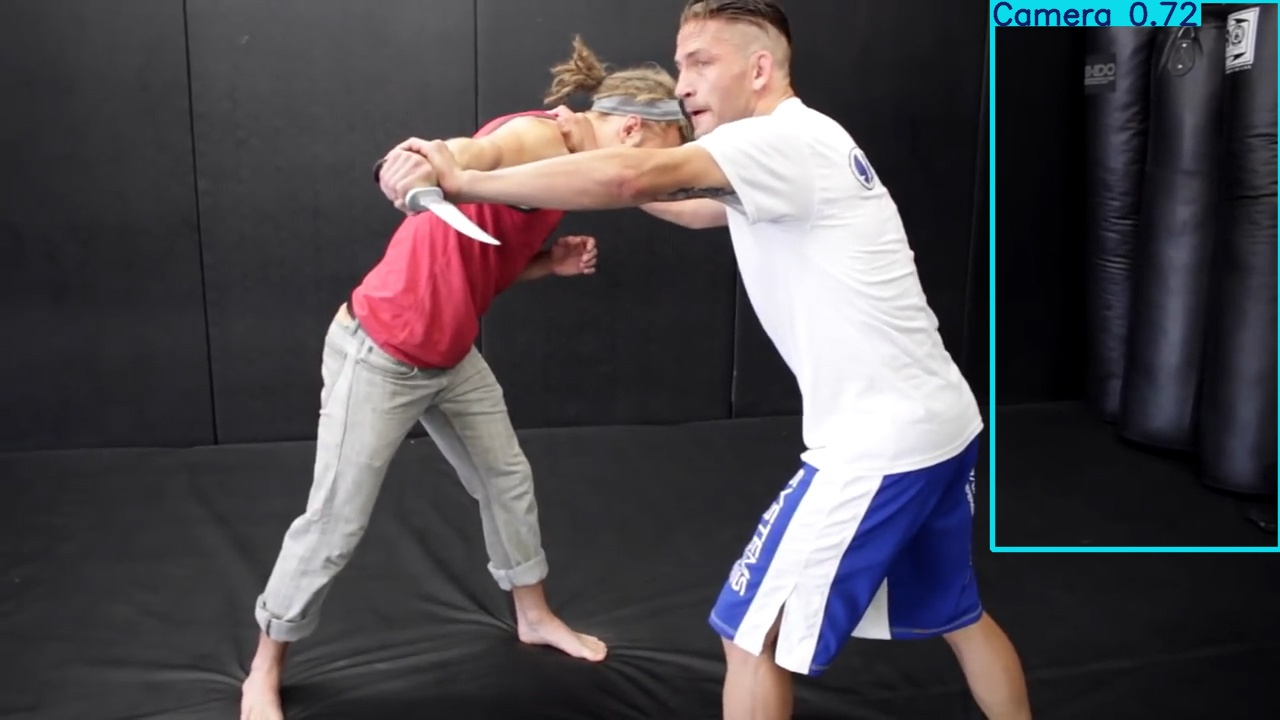

In [ ]:
from IPython.display import Image, display
import os

predict_dir = '/content/runs/detect/train24'

for img_name in os.listdir(predict_dir):
    if img_name.endswith(".jpg") or img_name.endswith(".png"):
        display(Image(filename=os.path.join(predict_dir, img_name)))
        break  # 첫 장만 표시 (원하면 반복문 삭제)


In [ ]:
label_dir = os.path.join(predict_dir, "labels")
if os.path.exists(label_dir):
    print("예측된 라벨 파일 목록:")
    print(os.listdir(label_dir)[:5])  # 상위 5개만 출력
else:
    print("예측된 라벨 텍스트 파일이 없습니다.")


예측된 라벨 파일 목록:
['pistol_5009.txt', '1b082b8ac097f66d_jpg.rf.7718cc1f9ec2c5dc7baf832c3df92ef8.txt', '2b0b5890bc569d90_jpg.rf.9bfee36ebe093b49b68da09da35fa19e.txt', '2f496ae10f5d716a_jpg.rf.0828400ac267991e54091cf5d6b8cc65.txt', 'KravMagaKnifeDefenseTechniques090.txt']


In [ ]:
latest_predict_dir = '/content/runs/detect/train24'  # 또는 predict2, predict3 확인 필요

# 예측 결과 이미지 출력
for fname in os.listdir(latest_predict_dir):
    if fname.endswith('.jpg') or fname.endswith('.png'):
        display(Image(os.path.join(latest_predict_dir, fname)))
        break  # 처음 한 장만 보고 싶을 경우